<a href="https://colab.research.google.com/github/GreigFodd/Network-Data-Generation-Vanilla-GAN/blob/main/CICIDS_MCClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Neural Network architecture used for multiclass classification of network intrusion classes within the CIC-IDS2017 dataset** 

[Dataset](https://www.unb.ca/cic/datasets/ids-2017.html) 

In [1]:
# importing required libraries
# pandas for data handling
# keras for machine learning functions
import pandas as pd
import keras

In [2]:
# data is stored in google drive folder so import drive to notebook 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read data and store in dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab/ProjectData/data.csv')

In [4]:
# print shape of data. for testing/data investigation
# does output match expected size in both dimensions? 
df.shape # matches

(1246610, 14)

In [5]:
# print number of samples for each label
# classes to be 'classified' 
df['label'].value_counts()

0    1170722
1      70619
5       2922
2       2332
3         11
4          4
Name: label, dtype: int64

labels defined in 'CICIDS-2017-preprocessing.ipynb' 

*   0 corresponding to 'Benign' class
*   1 corresponding to 'DoS Hulk' class
*   2 corresponding to 'DoS Slowloris' class
*   3 corresponding to 'Heartbleed' class
*   4 corresponding to 'Infiltration' class
*   5 corresponding to 'SSH-Patator' class

In [6]:
# split dataset

X = df.drop('label', axis=1)
y = df.label

In [7]:
X.shape, y.shape

((1246610, 13), (1246610,))

In [10]:
# split into test / train
# scikit learn train test split function to split the dataset
# 70% of training dataset will be used for training, remaining 30% used for testing

from sklearn.model_selection import train_test_split
train_ratio = 0.7
test_ratio = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=5) # set random state for consistent datasets when testing

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((872627, 13), (872627,), (373983, 13), (373983,))

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply power transformer function to numerical data

# from sklearn.preprocessing import PowerTransformer

# X_train[X_train.columns] = PowerTransformer(method='yeo-johnson', standardize=True, copy=True).fit_transform(X_train[X_train.columns])
# X_test[X_test.columns] = PowerTransformer(method='yeo-johnson', standardize=True, copy=True).fit_transform(X_test[X_test.columns])

In [13]:
# one hot encode data using keras 'to_categorical' function

# import function
from tensorflow.keras.utils import to_categorical

# data must be in dataframe to apply function, so convert
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

# apply function
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
# shapes of OHE labels
y_train.shape, y_test.shape

((872627, 6), (373983, 6))

**----------------------**

In [28]:
# build the classifier model
from keras.models import Sequential
from keras.layers import Dense

#def baseline_model():
  # create model
model = Sequential()
model.add(Dense(24, input_dim=13, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**------------------------------------------------**


In [29]:
# train model with training data

history = model.fit(X_train, y_train, batch_size = 1024, epochs = 25, verbose = 2, validation_split = 0.2)

Epoch 1/25
682/682 - 3s - loss: 0.2636 - accuracy: 0.9413 - val_loss: 0.1270 - val_accuracy: 0.9684
Epoch 2/25
682/682 - 2s - loss: 0.1193 - accuracy: 0.9691 - val_loss: 0.1213 - val_accuracy: 0.9692
Epoch 3/25
682/682 - 2s - loss: 0.1152 - accuracy: 0.9695 - val_loss: 0.1194 - val_accuracy: 0.9693
Epoch 4/25
682/682 - 2s - loss: 0.1127 - accuracy: 0.9697 - val_loss: 0.1189 - val_accuracy: 0.9696
Epoch 5/25
682/682 - 2s - loss: 0.1104 - accuracy: 0.9698 - val_loss: 0.1203 - val_accuracy: 0.9697
Epoch 6/25
682/682 - 2s - loss: 0.1080 - accuracy: 0.9700 - val_loss: 0.1236 - val_accuracy: 0.9698
Epoch 7/25
682/682 - 2s - loss: 0.1054 - accuracy: 0.9703 - val_loss: 0.1312 - val_accuracy: 0.9701
Epoch 8/25
682/682 - 2s - loss: 0.1028 - accuracy: 0.9712 - val_loss: 0.1419 - val_accuracy: 0.9711
Epoch 9/25
682/682 - 2s - loss: 0.0996 - accuracy: 0.9714 - val_loss: 0.1549 - val_accuracy: 0.9711
Epoch 10/25
682/682 - 2s - loss: 0.0962 - accuracy: 0.9716 - val_loss: 0.1694 - val_accuracy: 0.9711

In [30]:
score, acc = model.evaluate(X_test, y_test,verbose=2, batch_size= 256)

print('test accuracy:', acc)

1461/1461 - 3s - loss: 0.0692 - accuracy: 0.9816
test accuracy: 0.9815820455551147


In [31]:
# predictions // number of times the model classified an input as each class

# import numpy for argmax function // returns the max value on an axis... index with max value is predicted class
import numpy as np

yhat_probs= model.predict(X_test)
yhat_classes= np.argmax(yhat_probs, axis=1)

In [32]:
df_yhat_classes = pd.DataFrame(yhat_classes)
df_yhat_classes.value_counts()

0    356171
1     16742
2       629
5       438
3         3
dtype: int64

In [33]:
y_test_rounded = np.argmax(y_test, axis=1)

In [34]:
# import and run different evaluation metrics 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test_rounded, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test_rounded, yhat_classes, average='weighted')
print('Precision: %f' % precision)
recall = recall_score(y_test_rounded, yhat_classes, average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(y_test_rounded, yhat_classes, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.981582
Precision: 0.981157
Recall: 0.981582
F1 score: 0.980429


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


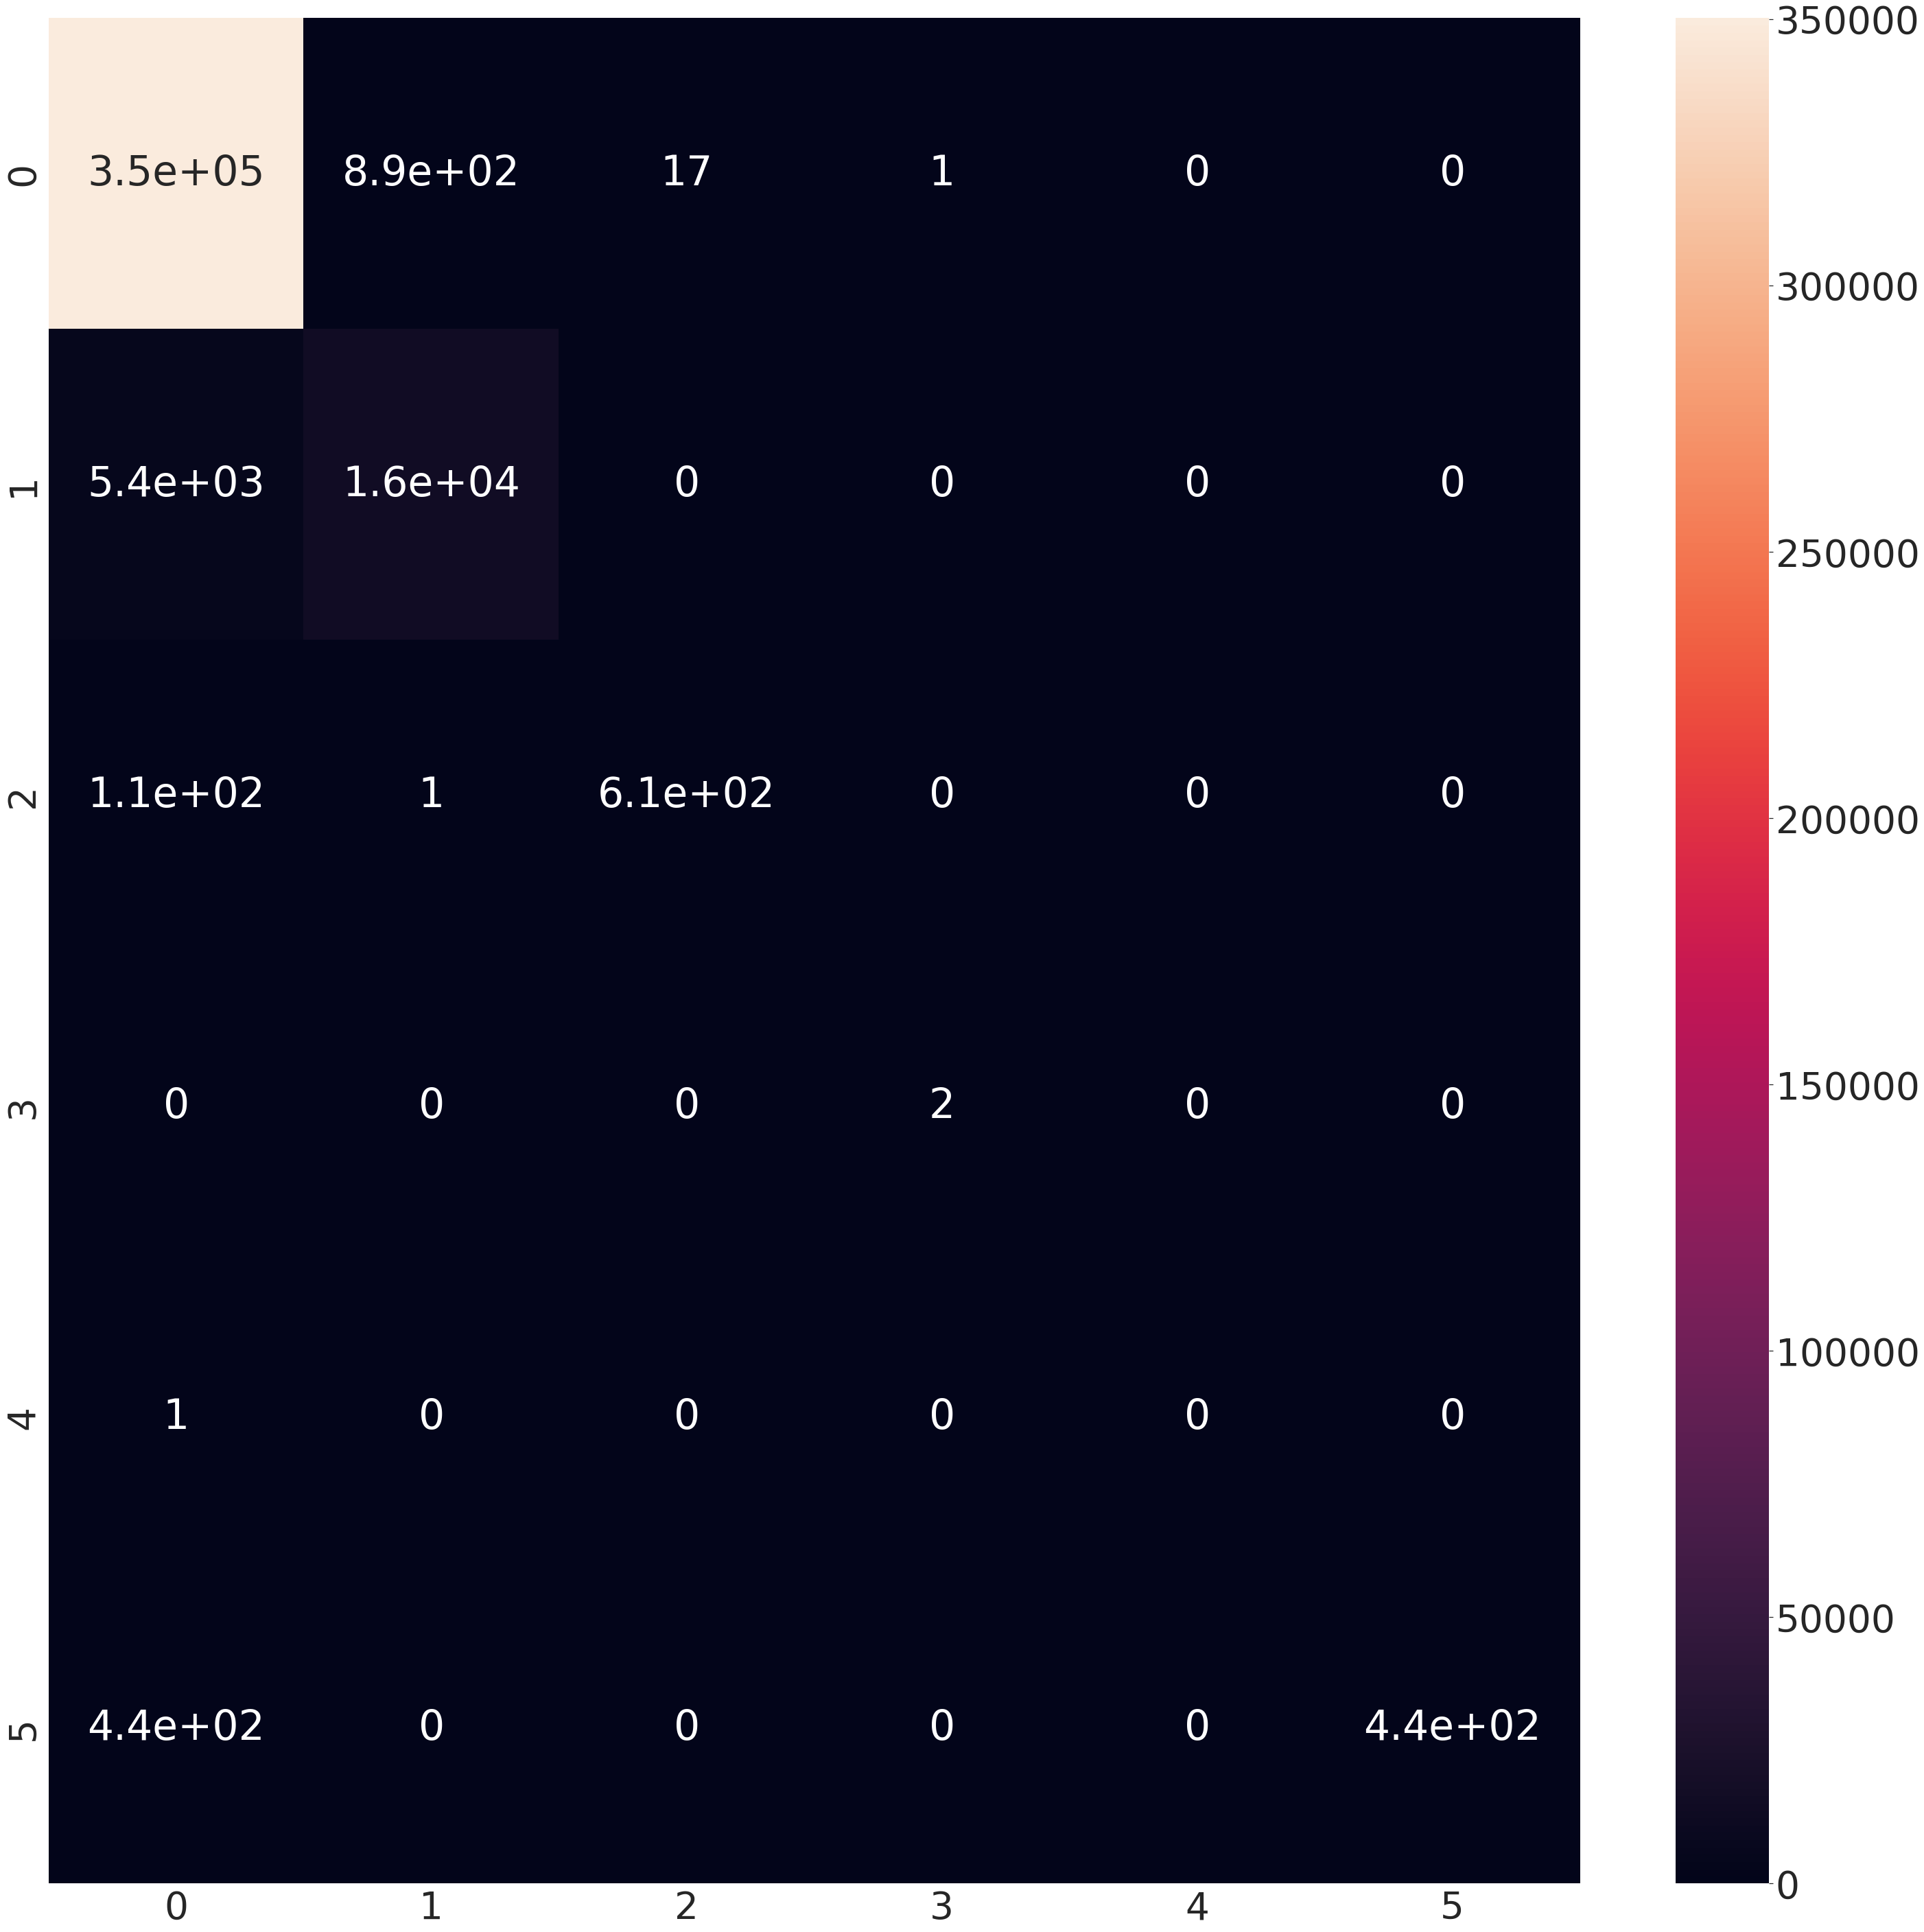

In [35]:
# import plotting function and confusion matrix

import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
import seaborn as sn

# confusion matrix

labels = [0, 1, 2, 3, 4, 5]

confusion_mat = confusion_matrix(y_test_rounded, yhat_classes, labels)
#print(cm)

df_cm = pd.DataFrame(confusion_mat, range(6), range(6))
sn.set(font_scale=5)

plt.figure(figsize = (50,50))
sn.heatmap(df_cm, annot=True)

plt.show()

model shows exceptional evaluation scores. Accuracy, Precision, Recall and F1 scores (reference: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) were all > 98%.

confusion matrix shows the exact distribution of predicitions. although very high evaluation scores, confusion matrix shows model performed poorly when attempting to classify classes 4 and 5, 'Infiltration' and 'SSH-Patator'. This could be a result of low number of training samples or that the selected features chosen do not provide enough unique information on these classes for the model to use as a predictor.  